## Q2

x_train has shape: (2000, 3)
x_test has shape: (1018, 3)


<IPython.core.display.Javascript object>


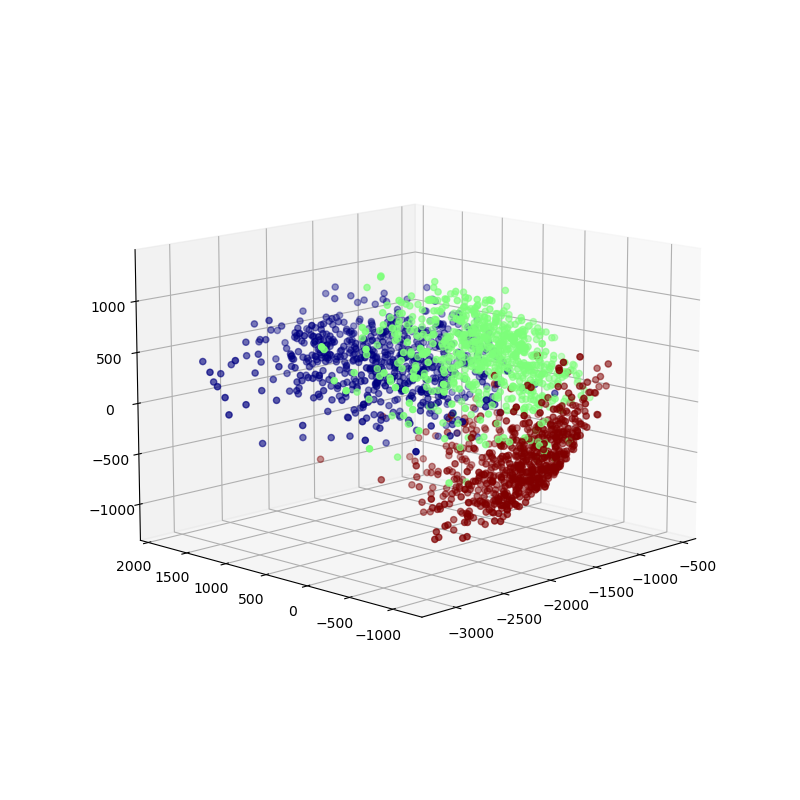

In [1]:
### Load the dataset (which is saved as a pickle file)
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('dataset.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    x_train, y_train, x_test, y_test  = pickle.load(f)

# Note that each data point is a row    
print('x_train has shape:', np.shape(x_train))
print('x_test has shape:', np.shape(x_test))

### Interactive scatter plot of dataset
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train, cmap='jet')

In [2]:
### From an earlier activity
### compute the mean of the three classes, return a column vector

# complete the code below
# hint 1 -- x_train[y_train==1,:] for example will extract only the elements from x_train that correspond to class 1
# hint 2 -- np.mean(blah, axis=0) will take the mean of each row
# hint 3 -- reshape your vector so that it's a column vector
mu_0 = np.mean(x_train[y_train==0,:], axis=0).reshape((-1,1))
mu_1 = np.mean(x_train[y_train==1,:], axis=0).reshape((-1,1))
mu_2 = np.mean(x_train[y_train==2,:], axis=0).reshape((-1,1))

### compute covariance of each class
### np.cov() expects each column to be a datapoint
cov_0 = np.cov(x_train[y_train==0,:].T)
cov_1 = np.cov(x_train[y_train==1,:].T)
cov_2 = np.cov(x_train[y_train==2,:].T)

In [3]:
### complete the code below to compute the log-likelihood ratio under all three classes
def log_likelihood(_x, _mu, _cov):
    ## _x and _mu should be column vectors, and _cov should be an n \times n matrix
    assert np.shape(_x) == np.shape(_mu)
    _log_likelihood = -1*np.linalg.slogdet(_cov)[1] - (_x-_mu).T@np.linalg.inv(_cov)@(_x-_mu)
    return _log_likelihood[0,0]

In [4]:
from sklearn.metrics import classification_report
### predict the class of the vectors in the test set
y_hat = []
for i, x in enumerate(x_test):
    x_column_vector = np.reshape(x,(-1,1))
    ll0 = log_likelihood(x_column_vector, mu_0, cov_0)
    ll1 = log_likelihood(x_column_vector, mu_1, cov_1)
    ll2 = log_likelihood(x_column_vector, mu_2, cov_2)
    y_hat.append(np.argmax([ll0, ll1, ll2]))
    
### compute the accuracy and print a classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       341
           1       0.90      0.96      0.93       336
           2       0.97      0.95      0.96       341

    accuracy                           0.94      1018
   macro avg       0.95      0.95      0.95      1018
weighted avg       0.95      0.94      0.95      1018



(1000, 3)


<IPython.core.display.Javascript object>


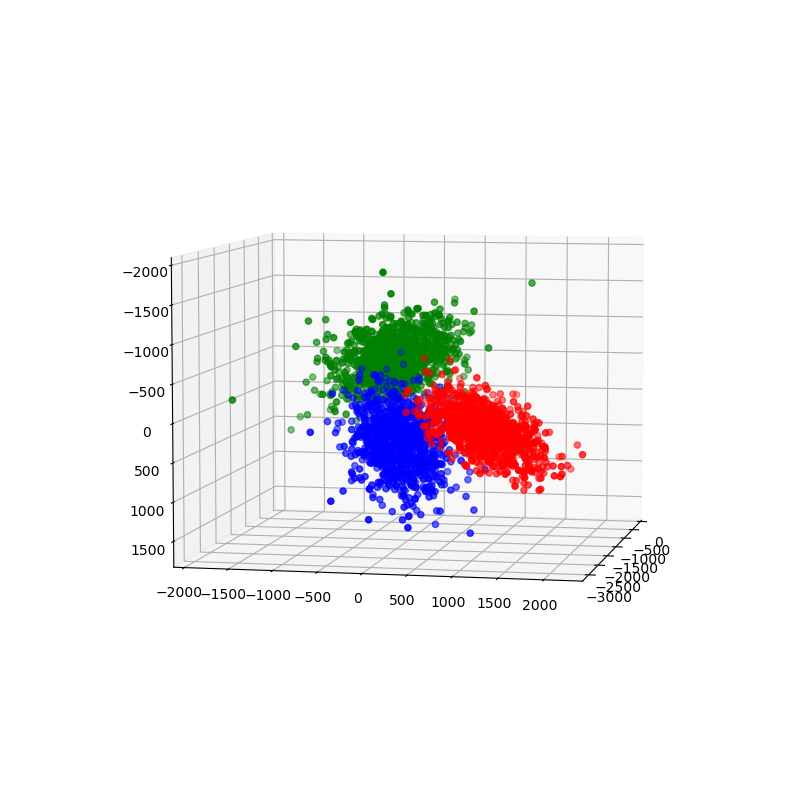

In [5]:
### create data points from three classes, and plot for comparison
x_0 = np.random.multivariate_normal(mu_0.squeeze(), cov_0, 1000)
x_1 = np.random.multivariate_normal(mu_1.squeeze(), cov_1, 1000)
x_2 = np.random.multivariate_normal(mu_2.squeeze(), cov_2, 1000)
print(np.shape(x_0))

# %matplotlib notebook #uncomment this line to make plot interactive
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_0[:,0], x_0[:,1], x_0[:,2], c='r', cmap='jet')
ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c='b', cmap='jet')
ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c='g', cmap='jet')

## a

In [77]:
from sklearn import mixture

### Start here.
### Write code below to implement Gaussian mixture and EM

In [78]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(x_train)
y_EM_train = gmm.fit_predict(x_train)

## b

<IPython.core.display.Javascript object>


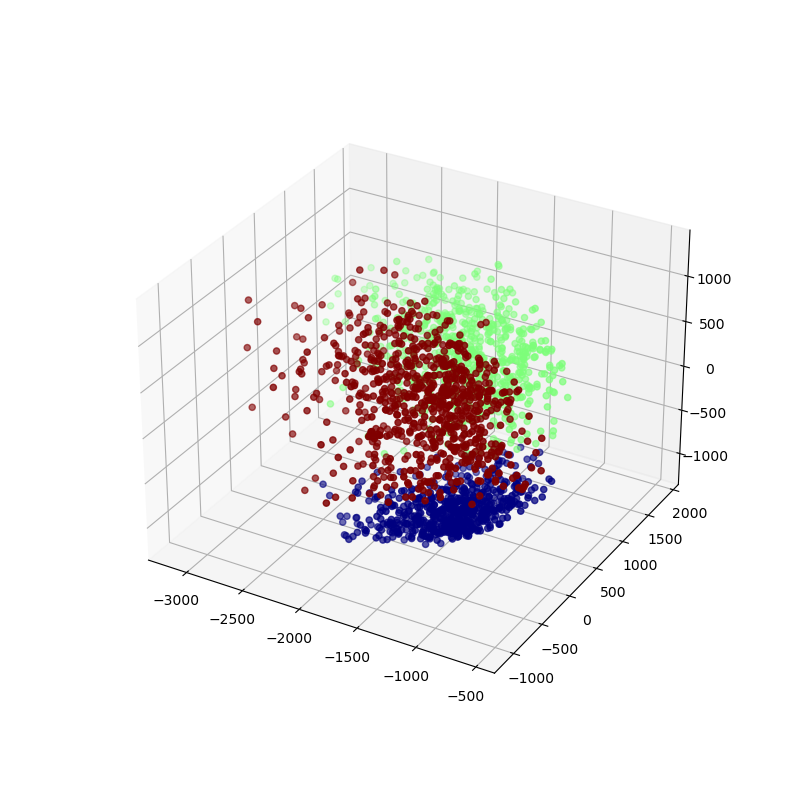

In [79]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2] , c=y_EM_train, cmap='jet')

## c

In [80]:
# ML 
print("params computed from ML")
print("means: ", np.hstack((mu_0, mu_1, mu_2)).T)
print("covariances: ", cov_0)
print(cov_1)
print(cov_2)

params computed from ML
means:  [[-1713.81050084   944.31365051   281.16236007]
 [-1552.93107583   -89.19746319   477.87368097]
 [-1295.33434171  -205.02751531  -567.1897333 ]]
covariances:  [[ 2.00183376e+05 -6.52227338e+04  1.36975829e+02]
 [-6.52227338e+04  1.37326374e+05  4.47994782e+04]
 [ 1.36975829e+02  4.47994782e+04  6.68313191e+04]]
[[189841.36785878 -12635.95079816 -38014.69527155]
 [-12635.95079816  71312.25210536  34677.35464327]
 [-38014.69527155  34677.35464327 107049.81922793]]
[[102911.65495427   8789.1205339   35885.2850861 ]
 [  8789.1205339  139937.25639306 -43562.24330135]
 [ 35885.2850861  -43562.24330135  98891.78375075]]


In [81]:
#EM
print("means: ", gmm.means_)
print('covariances: ', gmm.covariances_)

means:  [[-1288.0444108   -173.0877544   -653.01294118]
 [-1699.55379161   966.96794663   266.44530813]
 [-1537.80757098  -136.74988108   415.8095794 ]]
covariances:  [[[ 92926.18576186   7392.86839683  40796.13896518]
  [  7392.86839683 111629.0675653  -20887.38717239]
  [ 40796.13896518 -20887.38717239  54858.73908749]]

 [[204055.92443845 -72202.038599    -4986.79477082]
  [-72202.038599   112880.81277548  45961.71237651]
  [ -4986.79477082  45961.71237651  78372.65897091]]

 [[191665.19009974 -23188.2726937  -38221.56943699]
  [-23188.2726937   97330.10131853  53259.91724865]
  [-38221.56943699  53259.91724865 123375.14331804]]]


Results from 2 algorithms deviate from each other

## d

In [97]:
y_EM_test = gmm.predict(x_test)

# re-assign labels
y_EM_test = np.where(y_EM_test==2, -1, y_EM_test)
y_EM_test = np.where(y_EM_test==0, -2, y_EM_test)
y_EM_test = np.where(y_EM_test==1, 0, y_EM_test)
y_EM_test = np.abs(y_EM_test)

err_count = np.sum(y_EM_test != y_test)
print("error rate = ", err_count / len(y_test))

error rate =  0.08546168958742632


## e

In [109]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=3)
km.fit(x_train)
y_KM_train = km.fit_predict(x_train)

In [116]:
y_KM_test = km.predict(x_test)

# re-assign labels
y_KM_test = np.where(y_KM_test==0, -2, y_KM_test)
# y_KM_test = np.where(y_KM_test==0, -2, y_KM_test)
y_KM_test = np.where(y_KM_test==2, 0, y_KM_test)
y_KM_test = np.abs(y_KM_test)

err_count = np.sum(y_KM_test != y_test)
print("error rate = ", err_count / len(y_test))

error rate =  0.06581532416502947


error rate slightly higher than EM

## f

Try cluster/mixture counts from 1 to, say 10 for MNIST, then pick the iteration with min error rate

## Q3
## a